# Research

In [40]:
import pandas as pd
from sqlalchemy import create_engine

ENDPOINT = 'heicoders-playground.c2ced10ceyki.ap-southeast-1.rds.amazonaws.com'
PORT = 3306
USERNAME = 'student300'
PASSWORD = 'heicoders_AI300'
DBNAME = 'ai300_capstone'

database_conn = create_engine(f'mysql+pymysql://{USERNAME}:{PASSWORD}@{ENDPOINT}/{DBNAME}')    


In [41]:
query = """
    SELECT 
        account.*,
        account_usage.*,
        churn_status.status,
        churn_status.churn_label,
        city.city,
        customer.gender,
        customer.age,
        customer.senior_citizen,
        customer.married,
        customer.num_dependents
    FROM account
    LEFT JOIN account_usage ON account.account_id = account_usage.account_id
    LEFT JOIN churn_status ON account.customer_id = churn_status.customer_id
    LEFT JOIN customer ON account.customer_id = customer.customer_id
    LEFT JOIN city ON customer.zip_code = city.zip_code;
"""


In [42]:
df = pd.read_sql(query, database_conn)
df.head()

,account_id,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,...,total_charges_quarter,total_refunds,status,churn_label,city,gender,age,senior_citizen,married,num_dependents
0,AAJU-HMJLK,0334-ZFJSR,55,0,Yes,Cable,No,Yes,Yes,Yes,...,3462.10,44.53,Stayed,No,San Diego,Female,41,No,Yes,0
1,AAMB-TJYWC,4006-HKYHO,63,0,Yes,DSL,Yes,Yes,No,Yes,...,5309.50,0.00,Stayed,No,Bakersfield,Male,24,No,No,0
2,AANL-MWPZF,3258-SYSWS,72,0,Yes,Fiber Optic,Yes,Yes,Yes,Yes,...,7845.80,0.00,Stayed,No,Lakeside,Male,75,Yes,No,0
3,ABBQ-EXMMW,1820-DJFPH,72,4,No,None,No,Yes,Yes,No,...,1709.15,0.00,Stayed,No,Orick,Female,59,No,Yes,3
4,ABHW-EXJZF,0582-AVCLN,38,0,No,None,No,Yes,No,No,...,743.05,0.00,Stayed,No,Bakersfield,Female,43,No,No,0


## EDA

In [43]:
df.columns

Index(['account_id', 'customer_id', 'tenure_months', 'num_referrals',
       'has_internet_service', 'internet_type', 'has_unlimited_data',
       'has_phone_service', 'has_multiple_lines', 'has_premium_tech_support',
       'has_online_security', 'has_online_backup', 'has_device_protection',
       'contract_type', 'paperless_billing', 'payment_method', 'account_id',
       'avg_long_distance_fee_monthly', 'total_long_distance_fee',
       'avg_gb_download_monthly', 'stream_tv', 'stream_movie', 'stream_music',
       'total_monthly_fee', 'total_charges_quarter', 'total_refunds', 'status',
       'churn_label', 'city', 'gender', 'age', 'senior_citizen', 'married',
       'num_dependents'],
      dtype='object')

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure_months,7043.0,32.386767,24.542061,1.00,9.000,29.00,55.000,72.00
num_referrals,7043.0,1.951867,3.001199,0.00,0.000,0.00,3.000,11.00
avg_long_distance_fee_monthly,7043.0,22.958954,15.448113,0.00,9.210,22.89,36.395,49.99
total_long_distance_fee,7043.0,749.099262,846.660055,0.00,70.545,401.44,1191.100,3564.72
avg_gb_download_monthly,7043.0,20.515405,20.418940,0.00,3.000,17.00,27.000,85.00
total_monthly_fee,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.850,118.75
total_charges_quarter,7043.0,2280.381264,2266.220462,18.80,400.150,1394.55,3786.600,8684.80
total_refunds,7043.0,1.962182,7.902614,0.00,0.000,0.00,0.000,49.79
age,7043.0,46.509726,16.750352,19.00,32.000,46.00,60.000,80.00
num_dependents,7043.0,0.468692,0.962802,0.00,0.000,0.00,0.000,9.00


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_id                     7043 non-null   object 
 1   customer_id                    7043 non-null   object 
 2   tenure_months                  7043 non-null   int64  
 3   num_referrals                  7043 non-null   int64  
 4   has_internet_service           7043 non-null   object 
 5   internet_type                  7043 non-null   object 
 6   has_unlimited_data             7043 non-null   object 
 7   has_phone_service              7043 non-null   object 
 8   has_multiple_lines             7043 non-null   object 
 9   has_premium_tech_support       7043 non-null   object 
 10  has_online_security            7043 non-null   object 
 11  has_online_backup              7043 non-null   object 
 12  has_device_protection          7043 non-null   o

In [46]:
df.dtypes.value_counts()

object     24
int64       5
float64     5
dtype: int64

#### Modify DF

In [47]:
df_modified = df.copy()

In [48]:
def text_to_binary(attrition_str):
    
    if attrition_str == 'Yes':
        return 1
    
    else:
        return 0
    
def gender_to_binary(attrition_str):
    
    if attrition_str == 'Female':
        return 1
    
    else:
        return 0
    
def contract_type_to_binary(attrition_str):
    
    if attrition_str == 'Two Year':
        return 2
    
    elif attrition_str == 'One Year':
        return 1
    
    else:
        return 0
    
    
def churn_status_to_binary(attrition_str):
    
    if attrition_str == 'Stayed':
        return 1
    
    elif attrition_str == 'Joined':
        return 1
    
    else:
        return 0

In [49]:
df_modified['has_internet_service'] = df_modified['has_internet_service'].apply(text_to_binary)
df_modified['has_unlimited_data'] = df_modified['has_unlimited_data'].apply(text_to_binary)
df_modified['has_phone_service'] = df_modified['has_phone_service'].apply(text_to_binary)
df_modified['has_multiple_lines'] = df_modified['has_multiple_lines'].apply(text_to_binary)
df_modified['has_premium_tech_support'] = df_modified['has_premium_tech_support'].apply(text_to_binary)
df_modified['has_online_security'] = df_modified['has_online_security'].apply(text_to_binary)
df_modified['has_online_backup'] = df_modified['has_online_backup'].apply(text_to_binary)
df_modified['has_device_protection'] = df_modified['has_device_protection'].apply(text_to_binary)
df_modified['paperless_billing'] = df_modified['paperless_billing'].apply(text_to_binary)
df_modified['stream_tv'] = df_modified['stream_tv'].apply(text_to_binary)
df_modified['stream_movie'] = df_modified['stream_movie'].apply(text_to_binary)
df_modified['stream_music'] = df_modified['stream_music'].apply(text_to_binary)
df_modified['churn_label'] = df_modified['churn_label'].apply(text_to_binary)
df_modified['senior_citizen'] = df_modified['senior_citizen'].apply(text_to_binary)
df_modified['married'] = df_modified['married'].apply(text_to_binary)


df_modified['gender'] = df_modified['gender'].apply(gender_to_binary)

df_modified['contract_type'] = df_modified['contract_type'].apply(contract_type_to_binary)

df_modified['status'] = df_modified['status'].apply(churn_status_to_binary)

In [50]:

features = [
 'tenure_months',
 'num_referrals',
 'has_internet_service',
 'has_unlimited_data',
 'has_phone_service',
 'has_multiple_lines',
 'has_premium_tech_support',
 'has_online_security',
 'has_online_backup',
 'has_device_protection',
 'contract_type',
 'paperless_billing',
 'avg_long_distance_fee_monthly',
 'total_long_distance_fee',
 'avg_gb_download_monthly',
 'stream_tv',
 'stream_movie',
 'stream_music',
 'total_monthly_fee',
 'total_charges_quarter',
 'total_refunds',
 'gender',
 'age',
 'senior_citizen',
 'married',
 'num_dependents'
]

In [51]:
features_and_target = features.copy()
features_and_target.insert(0, 'churn_label')
features_and_target

['churn_label',
 'tenure_months',
 'num_referrals',
 'has_internet_service',
 'has_unlimited_data',
 'has_phone_service',
 'has_multiple_lines',
 'has_premium_tech_support',
 'has_online_security',
 'has_online_backup',
 'has_device_protection',
 'contract_type',
 'paperless_billing',
 'avg_long_distance_fee_monthly',
 'total_long_distance_fee',
 'avg_gb_download_monthly',
 'stream_tv',
 'stream_movie',
 'stream_music',
 'total_monthly_fee',
 'total_charges_quarter',
 'total_refunds',
 'gender',
 'age',
 'senior_citizen',
 'married',
 'num_dependents']

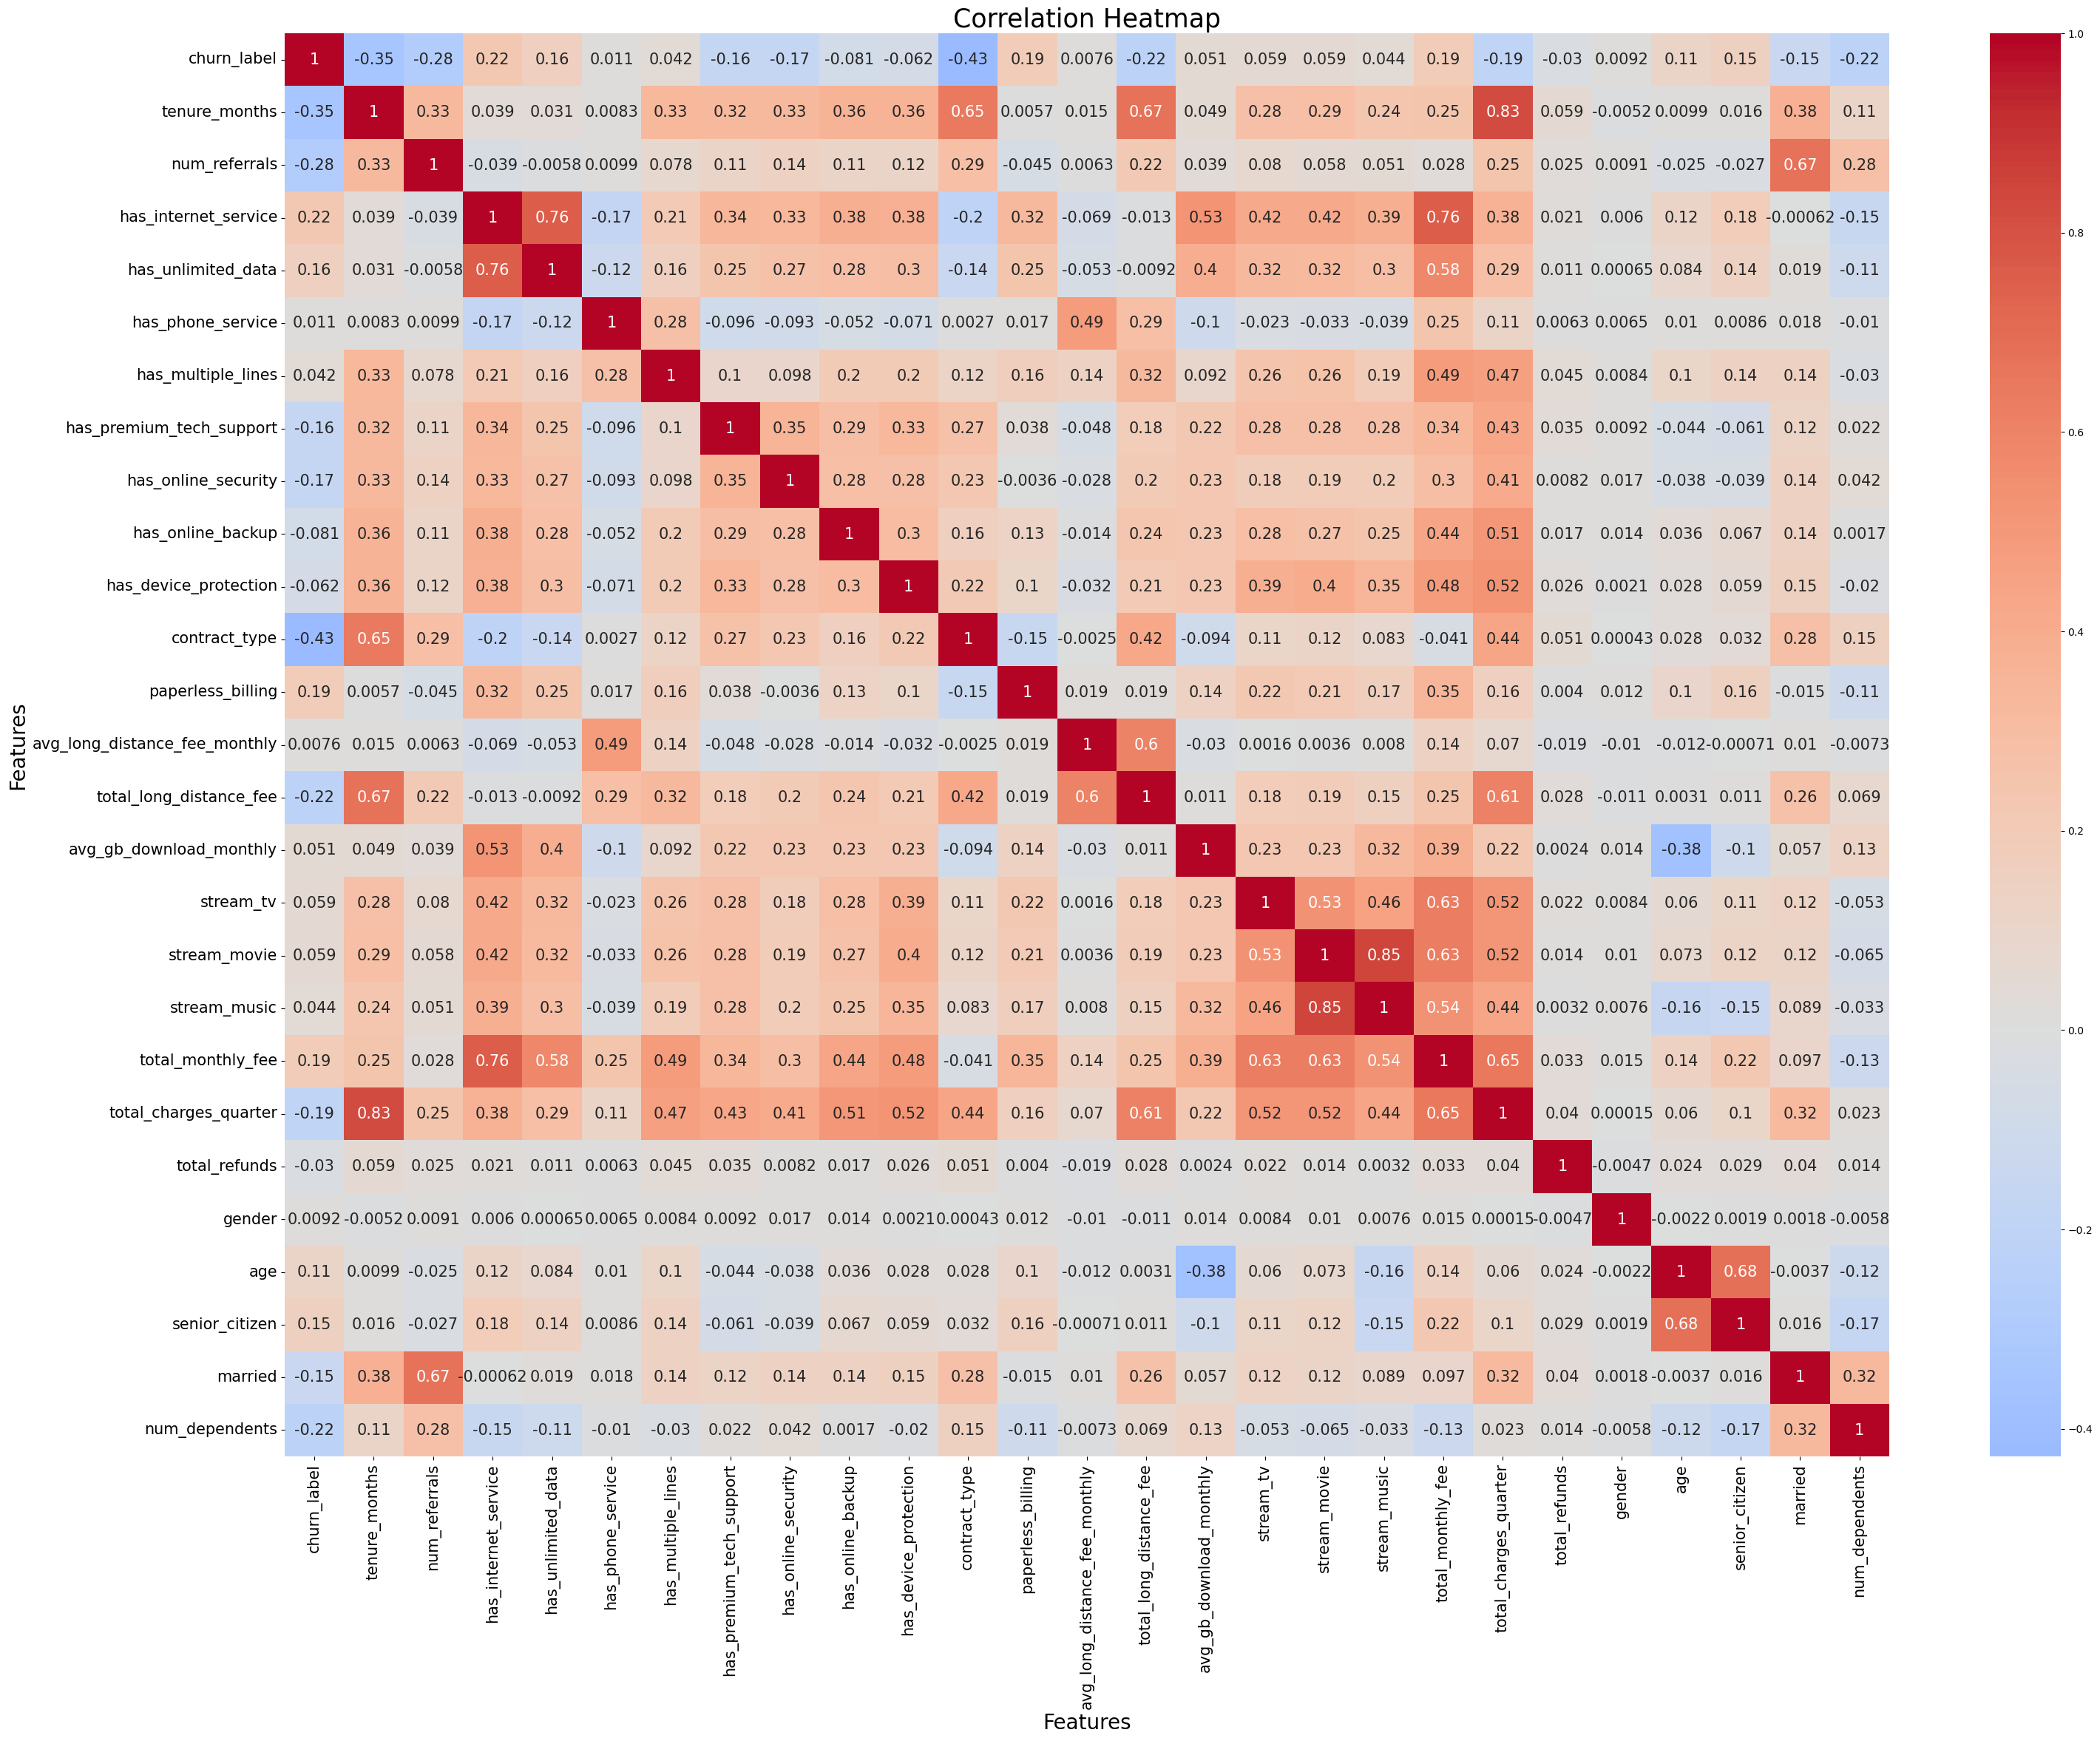

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_modified[features_and_target].corr()

plt.figure(figsize=(35, 25))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 15})

plt.title('Correlation Heatmap', fontsize=25)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Features', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()


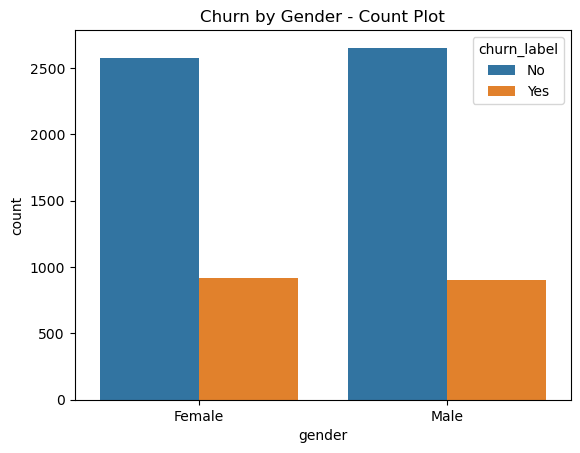

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

df_modified['gender'] = df_modified['gender'].map({1: 'Female', 0: 'Male'})
df_modified['churn_label'] = df_modified['churn_label'].map({1: 'Yes', 0: 'No'})

sns.countplot(x='gender', hue='churn_label', data=df_modified)
plt.title('Churn by Gender - Count Plot')
plt.show()


In [54]:
# Change from str to binary

data=df_modified['gender'] = data=df_modified['gender'].map({'Female': 1, 'Male': 0})
data=df_modified['churn_label'] = data=df_modified['churn_label'].map({'Yes': 1, 'No': 0})


## Train and Test Model

In [55]:
X = df_modified[features]
y = df_modified['churn_label']

#### Gradient Boosting Model

In [56]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

kf = KFold(n_splits=10)
auc_scores = []

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    GBMmodel = GradientBoostingClassifier(learning_rate=0.01,random_state=5)
    GBMmodel.fit(X_train,y_train)
    y_pred = GBMmodel.predict(X_test)
    y_pred_formatted = list(y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_formatted)
#     print(f'ROC Curve (AUC={auc(fpr, tpr):.4f})')
    auc_scores.append(auc(fpr, tpr))
    

average_auc = np.mean(auc_scores)
print(f'Average AUC: {average_auc:.4f}')


Average AUC: 0.6025


#### Logistic Regression

In [57]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
import numpy as np

kf = KFold(n_splits=10)
auc_scores = []

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    log_reg = LogisticRegression(max_iter=300, random_state=5)
    log_reg.fit(X_train,y_train)
    y_pred = log_reg.predict(X_test)
    y_pred_formatted = list(y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_formatted)
#     print(f'ROC Curve (AUC={auc(fpr, tpr):.4f})')
    auc_scores.append(auc(fpr, tpr))
    

average_auc = np.mean(auc_scores)
print(f'Average AUC: {average_auc:.4f}')


C:\Users\claud\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\claud\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Average AUC: 0.7321


C:\Users\claud\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Logistics Regression apply GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='roc_auc', cv=kf, verbose=2, n_jobs=-1)

grid_search.fit(X, y)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")
print(f"Best AUC Score: {grid_search.best_score_:.4f}")

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Best Parameters: {'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best AUC Score: 0.8922


In [60]:
# Uncomment to export model 

import joblib

joblib.dump(best_model, 'log_reg.pkl')

['log_reg.pkl']